## 1. Import the necessary libraries

In [1]:
from gensim.models import Word2Vec,KeyedVectors
import numpy as np
from tqdm import tqdm
import pandas as pd
from keras.utils import to_categorical
import numpy as np
from keras.utils import plot_model
from pyvi import ViTokenizer
import matplotlib.pyplot as plt
import import_ipynb
from data_process import remove_punctuation,remove_stopword
from keras.callbacks import EarlyStopping
from sklearn.manifold import TSNE
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense,BatchNormalization,LSTM,TimeDistributed
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

importing Jupyter notebook from data_process.ipynb
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7786 entries, 0 to 7785
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      7786 non-null   int64 
 1   comment    7786 non-null   object
 2   n_star     7786 non-null   int64 
 3   date_time  7786 non-null   object
 4   label      7786 non-null   object
dtypes: int64(2), object(3)
memory usage: 304.3+ KB


<string>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
<string>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


<string>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

(7786, 8)
Index(['index', 'comment', 'n_star', 'date_time', 'label', 'positive_count',
       'neutral_count', 'negative_count'],
      dtype='object')
(2224, 8)
Index(['index', 'comment', 'n_star', 'date_time', 'label', 'positive_count',
       'neutral_count', 'negative_count'],
      dtype='object')


## 2 Data preprocessing

> Read File CSV

In [2]:
def ReadData(path):
    df=pd.read_csv(path,encoding='utf-8')
    return df['comment'], df['label']

> Execute function

In [3]:
X_train,y_train = ReadData("../data/mobile_feedback/Cleaned_Train.csv")
X_test,y_test=ReadData("../data/mobile_feedback/Cleaned_Test.csv")

In [4]:
print(f"X_Train size:{X_train.shape}")
print(f"y_train size {y_train.shape}")

X_Train size:(7786,)
y_train size (7786,)


> word separation

In [5]:
def wordseparation(comment):
    return [review.split() for review in comment]

In [6]:
X_train=wordseparation(X_train)
X_test=wordseparation(X_test)
print(f"X_Train: {X_train[0:2]}")
print(f"X_test: {X_test[0:2]}")

X_Train: [['mới', 'mua', 'máy', 'thegioididong', 'thốt_nốt', 'cảm_thấy', 'ok', 'bin', 'trâu', 'chụp', 'ảnh', 'đẹp', 'loa', 'nghe', 'to', 'bắt', 'wf', 'khỏe_sóng', 'ổn_định', 'giá_thành', 'túi_tiền', 'nhân_viên', 'tư_vấn', 'nhiệt_tình'], ['pin', 'kém', 'còn', 'miễn', 'chê', 'mua', '832019', 'tình_trạng', 'pin', 'còn', '88', 'ai', 'giống', 'tôi']]
X_test: [['điện', 'thoải', 'ổn', 'facelock', 'cực', 'nhanh', 'vân', 'tay', 'ôk', 'màn_hình', 'lớn', 'pin', 'trâu', 'liên_quân', 'zalo', 'youtube', 'một', 'ngày', 'mất', 'khoảng', '45', 'tuy', 'chip', '439', 'mượt', 'đa_nhiệm', 'khá', 'ổn'], ['mình', 'mới', 'mua', 'vivo91c', 'tải', 'ứng_dụng', 'games', 'nhanh', 'hài_lòng', 'cài', 'hình', 'nền', 'khóa', 'màn_hình', 'hay', 'mình', 'biết', 'hết', 'chức_năng', 'nó', 'tư_vấn', 'viên', 'nhiệt_tình']]


> word embedding

In [7]:
model_wordembedding = Word2Vec(sentences=X_train, vector_size=128, window=5, min_count=0, workers=4, sg=1)
model_wordembedding.wv.save("../model/word.model")

> Load Model_Word2Vec

In [8]:
model_embedding = KeyedVectors.load('../model/word.model')
num_words = len(model_embedding.index_to_key)
print("Number of Words:", num_words)
print("Vector:", model_embedding.get_vector('phần_mềm'))

Number of Words: 11621
Vector: [-0.12509967 -0.3696522   0.2503154   0.00886213  0.20841986  0.00426314
 -0.2463825  -0.13280849 -0.43080255  0.45672074  0.23897177  0.00887215
 -0.29319263 -0.19111127  0.05143567  0.14275284 -0.4782563   0.0905299
 -0.18768716  0.15582123  0.01929825  0.14267097 -0.2506925  -0.5097568
 -0.16217557  0.33448052 -0.3838615   0.10868824  0.06069218 -0.07009725
 -0.17111877 -0.08521879  0.13769907  0.05476607  0.08402456  0.22213873
  0.713708   -0.17786922  0.04558583 -0.10973665 -0.32767597 -0.13184947
  0.15711176 -0.21820167  0.13021919  0.12899426 -0.39897498 -0.1822898
 -0.17315504  0.2224631   0.13525362  0.17775442  0.30500546  0.08459339
 -0.16593523  0.11626339  0.31165558 -0.02737031 -0.15669133 -0.15583809
 -0.0419164   0.00896834  0.1882001  -0.06913081  0.36626774  0.28606993
 -0.09595013  0.28147912 -0.11774146 -0.35970858  0.17416184 -0.38038707
 -0.55193317 -0.11163882 -0.06762918 -0.34135535 -0.14546973  0.46256372
 -0.18948114  0.2338411

> Get a list of vector representations of words

In [318]:
# Lấy danh sách các vectơ từ
vectors = [model_embedding.get_vector(word) for word in model_embedding.index_to_key]
vectors_array = np.array(vectors)
# Giảm chiều dữ liệu từ 128 chiều xuống còn 2 chiều bằng t-SNE
tsne = TSNE(n_components=2, random_state=42)
vectors_2d = tsne.fit_transform(vectors_array)
print(vectors_2d[0:2])

[[90.9323   10.64996 ]
 [91.4266    8.633709]]


> Visualize the context and semantic correlation of words

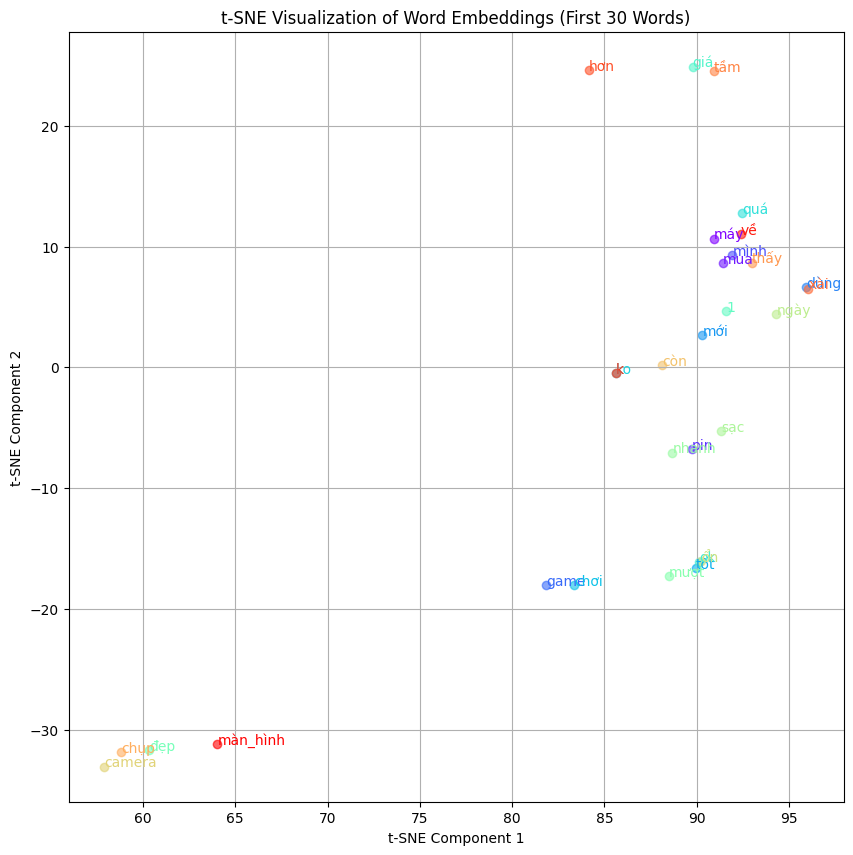

In [319]:
# Trực quan hóa các vectơ từ
plt.figure(figsize=(10, 10))
num_words = 30
# Màu cho mỗi từ
colors = plt.cm.rainbow(np.linspace(0, 1, num_words))

# Vẽ các điểm dữ liệu (từ) với màu khác nhau
for i, word in enumerate(model_embedding.index_to_key[:num_words]):  
    plt.scatter(vectors_2d[i, 0], vectors_2d[i, 1], marker='o', color=colors[i], alpha=0.6)
    plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]), fontsize=10, color=colors[i])

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Word Embeddings (First 30 Words)')
plt.grid(True)
plt.show()


> Corpus

In [320]:
model_embedding.key_to_index

{'máy': 0,
 'mua': 1,
 'pin': 2,
 'mình': 3,
 'game': 4,
 'dùng': 5,
 'mới': 6,
 'tốt': 7,
 'chơi': 8,
 'ko': 9,
 'quá': 10,
 'ok': 11,
 'giá': 12,
 '1': 13,
 'đẹp': 14,
 'mượt': 15,
 'nhanh': 16,
 'sạc': 17,
 'ngày': 18,
 'ổn': 19,
 'camera': 20,
 'còn': 21,
 'chụp': 22,
 'thấy': 23,
 'tầm': 24,
 'xài': 25,
 'hơn': 26,
 'k': 27,
 'về': 28,
 'màn_hình': 29,
 'trâu': 30,
 'trong': 31,
 'hơi': 32,
 'đc': 33,
 'khá': 34,
 'sản_phẩm': 35,
 '2': 36,
 'lỗi': 37,
 'tay': 38,
 'tháng': 39,
 'sao': 40,
 'hay': 41,
 'nhân_viên': 42,
 'mọi': 43,
 'sử_dụng': 44,
 'con': 45,
 'hình': 46,
 'sài': 47,
 'hết': 48,
 'vân': 49,
 'nói_chung': 50,
 'nhiệt_tình': 51,
 'ngon': 52,
 'thứ': 53,
 'nóng': 54,
 'lắm': 55,
 '3': 56,
 'nghe': 57,
 'nó': 58,
 'loa': 59,
 'luôn': 60,
 'điện_thoại': 61,
 'khác': 62,
 'tệ': 63,
 'lag': 64,
 'ảnh': 65,
 'người': 66,
 'wifi': 67,
 'xem': 68,
 'mấy': 69,
 'ở': 70,
 'nào': 71,
 'biết': 72,
 'bạn': 73,
 'lần': 74,
 'dc': 75,
 'cấu_hình': 76,
 'đổi': 77,
 'nói': 78,
 'hàng'

> Check to see how many words the longest sentence has

In [9]:
max_sequence = max([len(seq) for seq in X_train])
max_sequence_t=max ([len(seq) for seq in X_test ])
print(max_sequence)
print(max_sequence_t)

129
130


> convert words to vector space and padding

In [13]:
def comment_embedding(comment):
    matrix = np.zeros((130, 128))
    for i, word in enumerate(comment):
            if word in model_embedding:
                matrix[i] = model_embedding.get_vector(word)
    return matrix

> Execute Function

In [14]:
train_data = []
test_data =[]
for x in tqdm(X_train):
    train_data.append(comment_embedding(x))
for y in tqdm(X_test): 
    test_data.append(comment_embedding(y))
test_data=np.array(test_data)
train_data=np.array(train_data)

100%|██████████| 2224/2224 [00:00<00:00, 3036.26it/s]


> Convert labels to numbers

In [15]:
label_encoder = LabelEncoder()
# Mã hóa các nhãn văn bản thành các giá trị số
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded=label_encoder.fit_transform(y_test)
print(y_train_encoded[0:3])

[2 1 0]


> Convert label to one_hot_vector

In [16]:
# Biểu diễn nhãn dưới dạng one-hot vector
y_train_onehot = to_categorical(y_train_encoded)
print(y_train_onehot[0:3])

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


## 3.Built Model CNN

### 3.1. Design configuration for CNN network

In [327]:
num_classes = 3
filter_sizes = 3
num_filters = 150
epochs = 100
dropout_rate = 0.3
embedding_size=128
num_lstm_unit=20

> transform input properties

In [328]:
x_train = train_data.reshape(train_data.shape[0], 131, embedding_size, 1).astype('float32')

### 3.2. Model CNN

In [329]:
# Define the model
model = Sequential()
# Add a convolutional layer
model.add(Conv2D(num_filters, (filter_sizes, embedding_size), activation='relu',
                 input_shape=(131, embedding_size, 1),name='convolution_layer'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 1),strides=(2, 1),name='max_pooling'))
model.add(TimeDistributed(Flatten()))
model.add(Dropout(dropout_rate,name='dropout_layer1'))
model.add(LSTM(num_lstm_unit, return_sequences=True,name='LSTM_layer1'))
model.add(Dropout(dropout_rate,name='dropout_layer2'))
model.add(LSTM(num_lstm_unit,name='LSTM_layer2'))
model.add(Dense(3, activation='softmax'))

c:\Users\hdang\.virtualenvs\DM-xmUrTfoX\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


### 3.3. Hyperparameter

In [330]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### 3.4. Train

> Monitor the trainning process to stop earlier

In [331]:
# Khởi tạo callback EarlyStopping
early_stopping_callback = EarlyStopping(
    monitor='loss', 
    patience=10,          
    restore_best_weights=True  
)

In [332]:
model.fit(
    x_train,
    y_train_onehot,
    verbose=1,
    epochs=epochs,
    callbacks=[early_stopping_callback] 
)

Epoch 1/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 25s 76ms/step - accuracy: 0.4883 - loss: 0.9677
Epoch 2/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 19s 76ms/step - accuracy: 0.5116 - loss: 0.9401
Epoch 3/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 18s 72ms/step - accuracy: 0.5058 - loss: 0.9510
Epoch 4/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 17s 70ms/step - accuracy: 0.5103 - loss: 0.9506
Epoch 5/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 18s 72ms/step - accuracy: 0.5031 - loss: 0.9520
Epoch 6/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 17s 70ms/step - accuracy: 0.5139 - loss: 0.9475
Epoch 7/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 18s 72ms/step - accuracy: 0.5127 - loss: 0.9494
Epoch 8/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 17s 70ms/step - accuracy: 0.5149 - loss: 0.9522
Epoch 9/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 18s 73ms/step - accuracy: 0.5172 - loss: 0.9500
Epoch 10/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 18s 73ms/step - accuracy: 0.5254 - loss: 0.9416
Epoch 11/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 18s 74ms/step - accuracy: 0.5162 - loss: 0.9441
Epoch 12/100
244/24

>Network Architecture

In [333]:
print(model.summary())

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ convolution_layer (Conv2D)      │ (None, 129, 1, 150)    │        57,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 129, 1, 150)    │           600 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling (MaxPooling2D)      │ (None, 64, 1, 150)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_5              │ (None, 64, 150)        │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_layer1 (Dropout)        │ (None, 64, 150)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LSTM_layer1 (LSTM)              │ (None, 64, 20)         │        13,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_layer2 (Dropout)        │ (None, 64, 20)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LSTM_layer2 (LSTM)              │ (None, 20)             │         3,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │            63 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,521 (880.95 KB)

 Trainable params: 75,073 (293.25 KB)

 Non-trainable params: 300 (1.17 KB)

 Optimizer params: 150,148 (586.52 KB)

None


> Network Architecture Diagram

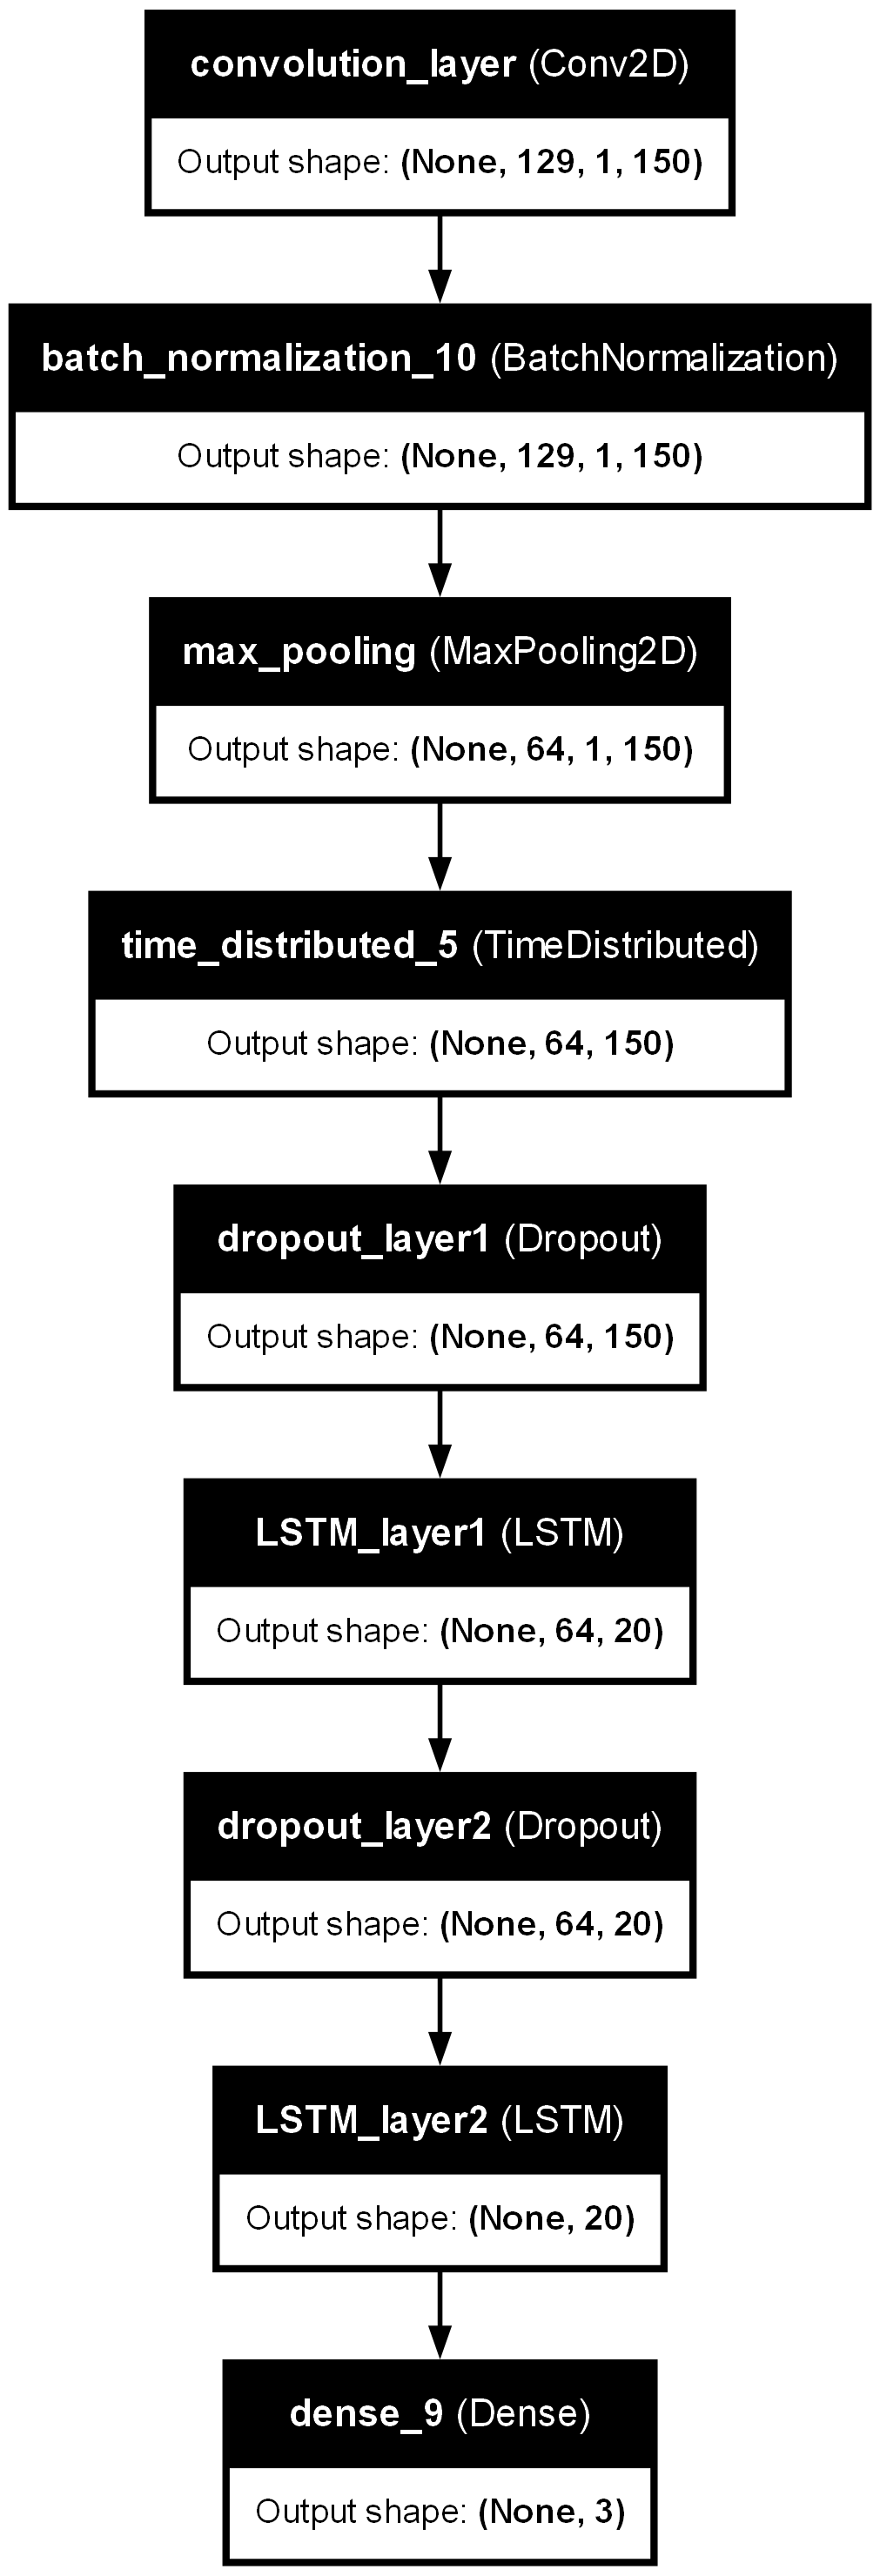

In [334]:
plot_model(model, to_file='../design/model_CNN_sentiment_plot.png', show_shapes=True, show_layer_names=True)

> Dump file model_cnn_sentiment.h5

In [335]:
model.save('../model/model_cnn_sentiment.h5')

### 3.5 Evaluation test dataset

> Load file models_sentiment.h5

In [17]:
model_sentiment=load_model("../model/model_cnn_sentiment.h5")

> predict  test dataset 

In [337]:
result = model_sentiment.predict(test_data)

70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step


> First 10 lines of comments

In [338]:
predict_labels = np.argmax(result,axis=1)
print(predict_labels[0:10])
# Decode the predicted labels
predicted_labels_decoded = label_encoder.inverse_transform(predict_labels)
print(predicted_labels_decoded[0:10])


[2 1 2 0 2 1 2 2 2 0]
['Positive' 'Neutral' 'Positive' 'Negative' 'Positive' 'Neutral'
 'Positive' 'Positive' 'Positive' 'Negative']


> Data Preprocessing sample

In [18]:
def Preprocessing(comment):
    comment= remove_punctuation(comment.lower())
    comment= remove_stopword(comment)
    comment= [ViTokenizer.tokenize(comment)]
    comment = wordseparation(comment)
    comment =np.expand_dims(comment_embedding(comment[0]),axis=0)
    return comment

> Predict one a new sample

In [19]:
comment = "Máy thiết kế quá đẹp ,dùng dk mấy hôm r thấy máy vẫn ổn ,tiếc là pin tụt quá nhanh ,pin sạc thì nhanh nóng 😌"
comment_preprocessed=Preprocessing(comment)
result_one = model_sentiment.predict(comment_preprocessed)
result_one = np.argmax(result_one,axis=1)
# Decode the predicted labels
print(label_encoder.inverse_transform(result_one))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step
['Neutral']


> Evaluate the model through Accuracy measures,Precision,Recall,F1-score,

In [341]:
accuracy = accuracy_score(y_test_encoded, predict_labels)
print(f'Accuracy: {accuracy:.4f}')

precision = precision_score(y_test_encoded, predict_labels, average='weighted')
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test_encoded, predict_labels, average='weighted')
print(f"Recall: {recall:.4f}")

f1score = f1_score(y_test_encoded, predict_labels, average='weighted')
print(f"F1-score: {f1score}")

Accuracy: 0.8112
Precision: 0.8067
Recall: 0.8112
F1-score: 0.8084574235703501
